# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 2381 Ваньков Ярослав Сергеевич и Вакуленко Инна Юрьевна. Бригада №4.


## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).


## Основные теоретические положения

### Дискретное преобразование Фурье

Рассмотрим периодический дискретный сигнал $x[n]$. Амплитуды его спектра можно получить с помощью дискретного преобразования Фурье:

$$X[k] = \frac{1}{N} \sum_{n=0}^{N-1} x[n] e^{-i \frac{2\pi}{N} kn}$$

где $k$ — номер гармоники, $\omega_k = \frac{2\pi k}{N}$ — соответствующая круговая частота.

### Дифференциальный фильтр первого порядка

Численное дифференцирование 1-го порядка реализуется по формуле центральной разности:

$$y[n] = \frac{x[n+1] - x[n-1]}{2T}$$

Передаточная функция:

$$H(\omega) = \frac{e^{i\omega} - e^{-i\omega}}{2T} = \frac{i\sin(\omega)}{T}$$

### Интегральный фильтр (формула прямоугольников)

Численное интегрирование по формуле прямоугольников:

$$y[n] = y[n-1] + \frac{x[n-1] + x[n]}{2} \cdot T$$

Передаточная функция:

$$H(\omega) = \frac{T(1 + e^{-i\omega})}{2(1 - e^{-i\omega})}$$

### Интегральный фильтр (формула трапеций)

Численное интегрирование по формуле трапеций:

$$y[n] = y[n-1] + \frac{x[n-1] + x[n]}{2T}$$

Передаточная функция:

$$H(\omega) = \frac{1 + e^{-i\omega}}{2T(1 - e^{-i\omega})}$$

### Интегральный фильтр (формула Симпсона)

Численное интегрирование по формуле Симпсона:

$$y[n] = y[n-1] + \frac{x[n-1] + 4x[n] + x[n+1]}{3} \cdot T$$

Передаточная функция:

$$H(\omega) = \frac{T(e^{-i\omega} + 4 + e^{i\omega})}{3(1 - e^{-i\omega})}$$


## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

**Порядок выполнения работы:**

1. Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k \cos(\omega_k t + \varphi_k)$.
2. Визуализировать исходные аналоговый и дискретизированный сигналы.
3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.
4. Применить линейное сглаживание по 5 и 9 точкам.
5. Применить дифференциальный фильтр 1-го порядка.
6. Применить интегральные фильтры:
   - Формула прямоугольников
   - Формула трапеций
   - Формула Симпсона
7. Для каждого фильтра визуализировать отфильтрованный сигнал и его спектр.
8. Проанализировать результаты и сделать выводы.


## Выполнение работы

### 1. Импорт библиотек и параметры


In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

n = 11  # количество гармоник
N = 32  # количество отсчетов
dw = math.pi * 0.1  # шаг частоты
T = 1  # период дискретизации

### 2. Генерация коэффициентов косинусоид


In [2]:
random.seed(4)  # используем номер бригады для воспроизводимости

# Генерация частот
w = [dw * i for i in range(n)]

# Генерация амплитуд (случайная перестановка от 1 до 11)
A = list(range(1, n + 1))
random.shuffle(A)

# Генерация фаз (случайные числа от 0 до 0.5)
phi = [random.uniform(0, 0.5) for _ in range(n)]

print("Сгенерированные коэффициенты гармонических сигналов:")
print(f"Частоты ω: {[round(wi, 4) for wi in w]}")
print(f"Амплитуды A: {A}")
print(f"Фазы φ: {[round(p, 4) for p in phi]}")

Сгенерированные коэффициенты гармонических сигналов:
Частоты ω: [0.0, 0.3142, 0.6283, 0.9425, 1.2566, 1.5708, 1.885, 2.1991, 2.5133, 2.8274, 3.1416]
Амплитуды A: [3, 6, 8, 10, 1, 9, 11, 7, 2, 5, 4]
Фазы φ: [0.2747, 0.1447, 0.495, 0.0294, 0.2602, 0.1801, 0.3899, 0.4134, 0.1309, 0.4715, 0.0128]


### 3. Формирование аналогового и дискретного сигналов

Исходный аналоговый сигнал:

$$s(t) = \sum_{k=0}^{10} A_k \cos(\omega_k t + \varphi_k)$$

Дискретный сигнал:

$$s[n] = \sum_{k=0}^{10} A_k \cos(\omega_k n + \varphi_k), \quad n = 0, 1, \ldots, 31$$


In [3]:
# Функция аналогового сигнала
def s(t):
    return sum([A[i] * math.cos(w[i]*t + phi[i]) for i in range(n)])

# Дискретные отсчёты
Xn = list(range(N))
S = [s(x) for x in Xn]

# Отсчёты для графика аналогового сигнала (более плотная сетка)
X_analog = [i * N / 4096 for i in range(4096)]
S_analog = [s(x) for x in X_analog]

### 4. Визуализация исходного аналогового и дискретизированного сигналов


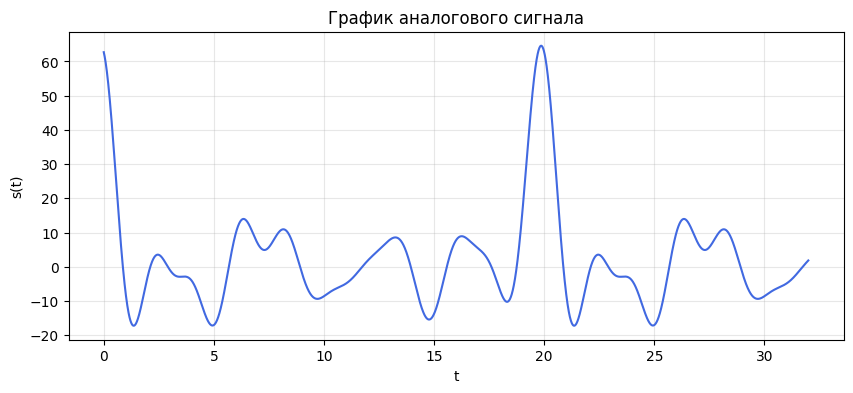

In [4]:
# График аналогового сигнала
plt.figure(figsize=(10, 4))
plt.plot(X_analog, S_analog, color='royalblue', linewidth=1.5)
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('График аналогового сигнала')
plt.grid(True, alpha=0.3)
plt.show()

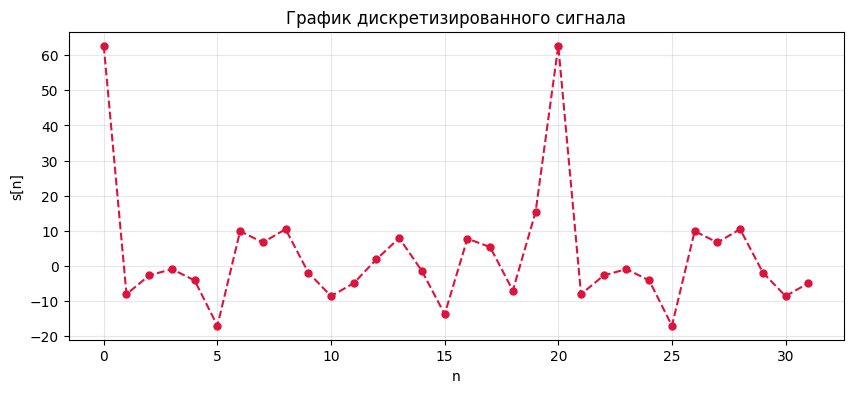

In [5]:
# График дискретизированного сигнала
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', color='crimson', linewidth=1.5, markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('График дискретизированного сигнала')
plt.grid(True, alpha=0.3)
plt.show()

### 5. Дискретные отсчеты спектра дискретного сигнала


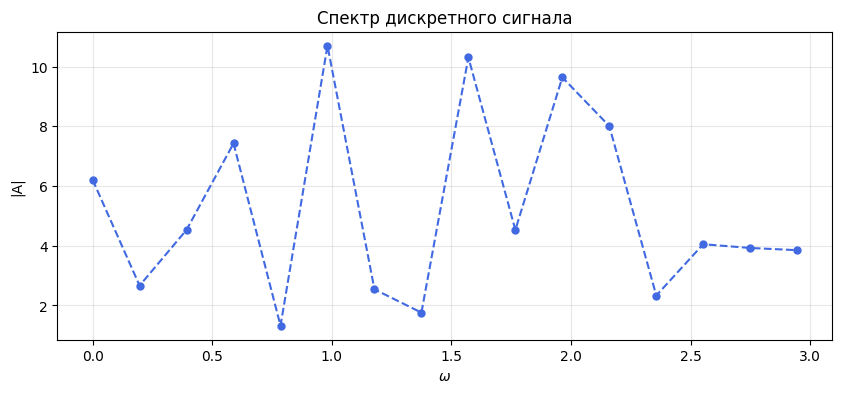

In [6]:
# Преобразование Фурье для исходного сигнала
W = np.fft.fftfreq(N, d=T)[:N // 2] * 2 * np.pi
F = np.fft.fft(S, norm='forward')[:N // 2] * 2

# График спектра исходного сигнала
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', linewidth=1.5, markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Спектр дискретного сигнала')
plt.grid(True, alpha=0.3)
plt.show()

### 6. Линейное сглаживание по 5 и 9 точкам

Формулы передаточной функции для линейного сглаживания:

**Линейное сглаживание по 5 точкам:**

$$y[n] = \frac{1}{5}(x[n-2] + x[n-1] + x[n] + x[n+1] + x[n+2])$$

$$H(\omega) = \frac{1 + 2\cos(\omega) + 2\cos(2\omega)}{5}$$

**Линейное сглаживание по 9 точкам:**

$$y[n] = \frac{1}{9}\sum_{k=-4}^{4} x[n+k]$$

$$H(\omega) = \frac{1 + 2\sum_{k=1}^{4}\cos(k\omega)}{9}$$


In [7]:
# Линейное сглаживание по 5 точкам
def L_5(S):
    y = []
    for i in range(2, N - 2):
        y.append((S[i-2] + S[i-1] + S[i] + S[i+1] + S[i+2]) / 5)
    return ([0] * 2) + y + ([0] * 2)

# Линейное сглаживание по 9 точкам
def L_9(S):
    y = []
    for i in range(4, N - 4):
        y.append(sum([S[i+k] for k in range(-4, 5)]) / 9)
    return ([0] * 4) + y + ([0] * 4)

Y_L_5 = L_5(S)
Y_L_9 = L_9(S)

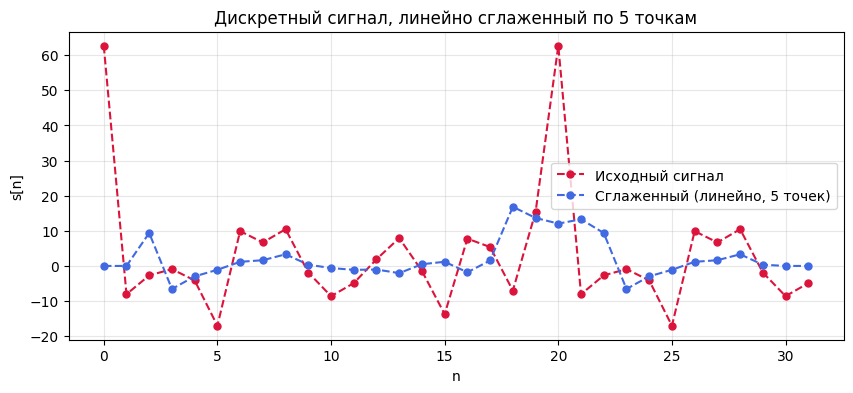

In [8]:
# Сглаженный сигнал (линейно 5 точек)
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал', markersize=5)
plt.plot(Xn, Y_L_5, 'o--', color='royalblue', label='Сглаженный (линейно, 5 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал, линейно сглаженный по 5 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

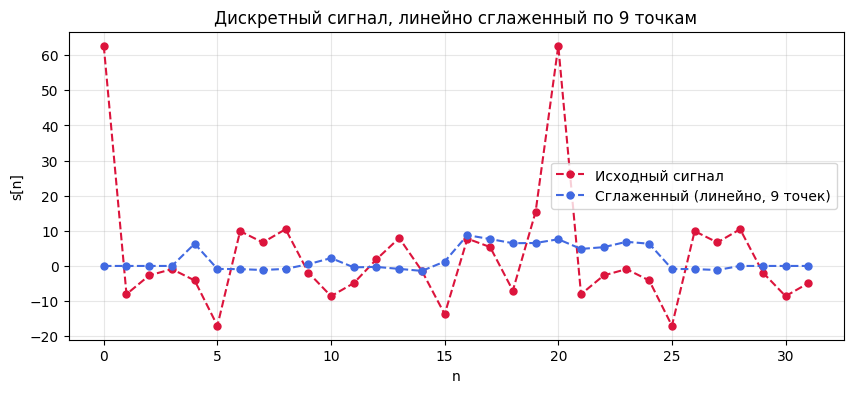

In [9]:
# Сглаженный сигнал (линейно 9 точек)
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал', markersize=5)
plt.plot(Xn, Y_L_9, 'o--', color='royalblue', label='Сглаженный (линейно, 9 точек)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал, линейно сглаженный по 9 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

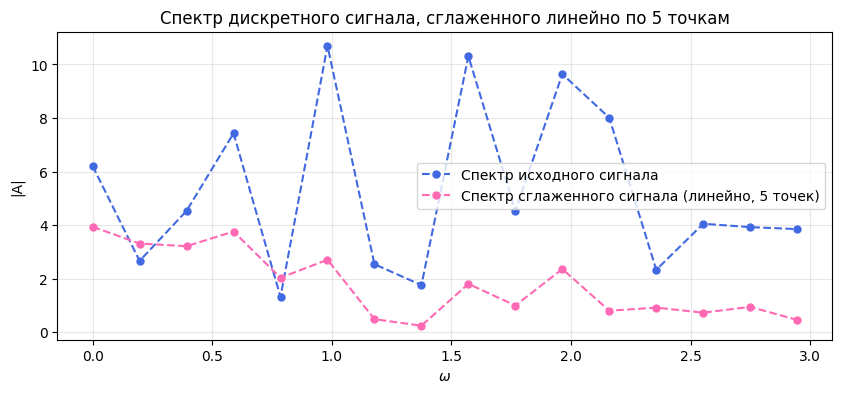

In [10]:
# Преобразование Фурье для сглаженных сигналов (линейное)
F_L_5 = np.fft.fft(Y_L_5, norm='forward')[:N // 2] * 2
F_L_9 = np.fft.fft(Y_L_9, norm='forward')[:N // 2] * 2

# Спектр сглаженного сигнала (линейный 5 точек)
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_L_5], 'o--', color='hotpink', label='Спектр сглаженного сигнала (линейно, 5 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Спектр дискретного сигнала, сглаженного линейно по 5 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

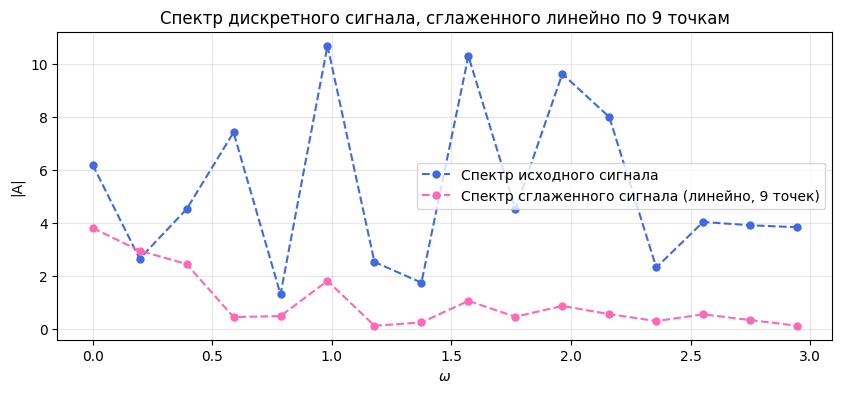

In [11]:
# Спектр сглаженного сигнала (линейный 9 точек)
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_L_9], 'o--', color='hotpink', label='Спектр сглаженного сигнала (линейно, 9 точек)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Спектр дискретного сигнала, сглаженного линейно по 9 точкам')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

**Интерпретация:** В результате фильтрации амплитуды сигналов подавляются, причём чем дальше от нуля, тем заметнее. При увеличении количества точек спектр сильнее сглаживается, то есть происходит более сильное подавление более высоких частот. Полученный результат соответствует значениям $H(\omega)$, полученным в предыдущей практической работе.


### 7. Дифференциальный фильтр первого порядка

Формула передаточной функции для дифференциального фильтра первого порядка:

$$y[n] = \frac{x[n+1] - x[n-1]}{2T}$$

$$H(\omega) = \frac{e^{i\omega} - e^{-i\omega}}{2T} = \frac{i\sin(\omega)}{T}$$


In [12]:
# Дифференцирование первого порядка
def diff1(S):
    return [0] + [(S[i+1] - S[i-1]) / (2*T) for i in range(1, len(S) - 1)] + [0]

Y_D_1 = diff1(S)

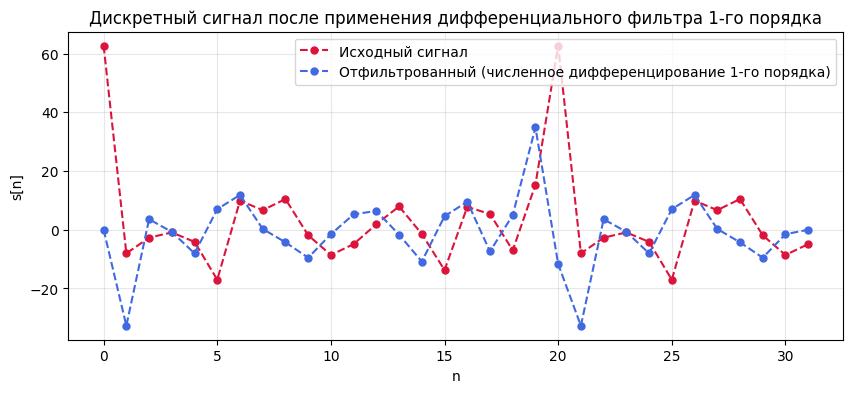

In [13]:
# Отфильтрованный сигнал (дифференциальный 1-го порядка)
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал', markersize=5)
plt.plot(Xn, Y_D_1, 'o--', color='royalblue', label='Отфильтрованный (численное дифференцирование 1-го порядка)', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал после применения дифференциального фильтра 1-го порядка')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

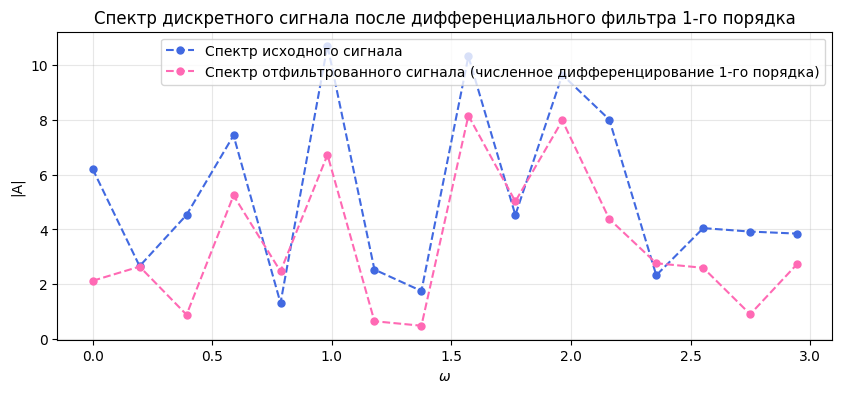

In [14]:
# Преобразование Фурье для дифференцированного сигнала
F_D_1 = np.fft.fft(Y_D_1, norm='forward')[:N // 2] * 2

# Спектр отфильтрованного сигнала (численное дифференцирование 1-го порядка)
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_D_1], 'o--', color='hotpink', label='Спектр отфильтрованного сигнала (численное дифференцирование 1-го порядка)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Спектр дискретного сигнала после дифференциального фильтра 1-го порядка')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

**Интерпретация:** На данном графике видно, что сильнее подавляются низкие частоты, другие частоты также подавляются, но значительно слабее. Это характерная особенность дифференциальных фильтров — они действуют как высокочастотные фильтры.


### 8. Интегральный фильтр (формула прямоугольников)

Формула передаточной функции для интегрального фильтра, соответствующего квадратурной формуле прямоугольников:

$$y[n] = y[n-1] + \frac{x[n-1] + x[n]}{2}$$

$$H(\omega) = \frac{T(1 + e^{-i\omega})}{2(1 - e^{-i\omega})}$$


In [15]:
# Интегрирование по формуле прямоугольников
def int_rectangles(S):
    Y = [0]
    for i in range(1, len(S)):
        Y.append(Y[-1] + (S[i-1] + S[i]) / 2)
    return Y

Y_int_rect = int_rectangles(S)

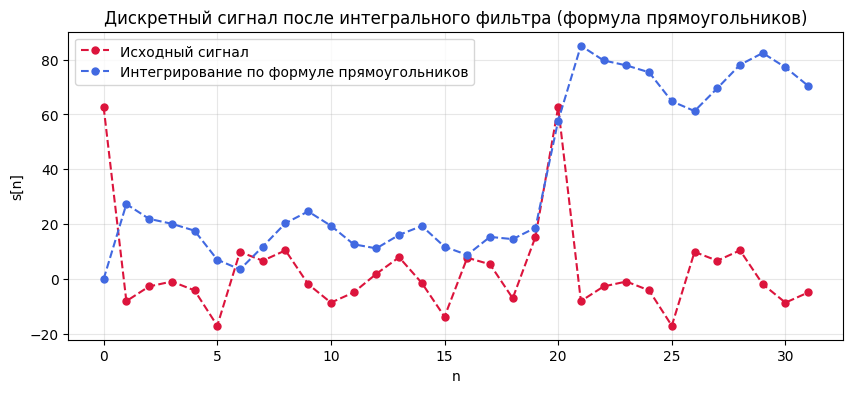

In [16]:
# График отфильтрованного сигнала (интегрирование по формуле прямоугольников)
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал', markersize=5)
plt.plot(Xn, Y_int_rect, 'o--', color='royalblue', label='Интегрирование по формуле прямоугольников', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал после интегрального фильтра (формула прямоугольников)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

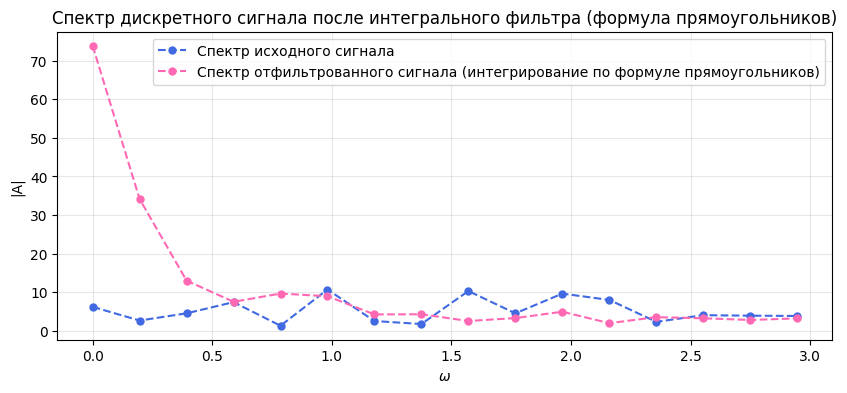

In [17]:
# Преобразование Фурье для отфильтрованного сигнала
F_int_rect = np.fft.fft(Y_int_rect, norm='forward')[:N // 2] * 2

# Спектр отфильтрованного сигнала
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_int_rect], 'o--', color='hotpink', label='Спектр отфильтрованного сигнала (интегрирование по формуле прямоугольников)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Спектр дискретного сигнала после интегрального фильтра (формула прямоугольников)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### 9. Интегральный фильтр (формула трапеций)

Формула передаточной функции для интегрального фильтра, соответствующего квадратурной формуле трапеций:

$$y[n] = y[n-1] + \frac{x[n-1] + x[n]}{2T}$$

$$H(\omega) = \frac{1 + e^{-i\omega}}{2T(1 - e^{-i\omega})}$$


In [18]:
# Интегрирование по формуле трапеций
def int_trapezoid(S):
    Y = [0]
    for i in range(1, len(S)):
        Y.append(Y[-1] + (S[i-1] + S[i]) / (2*T))
    return Y

Y_int_trap = int_trapezoid(S)

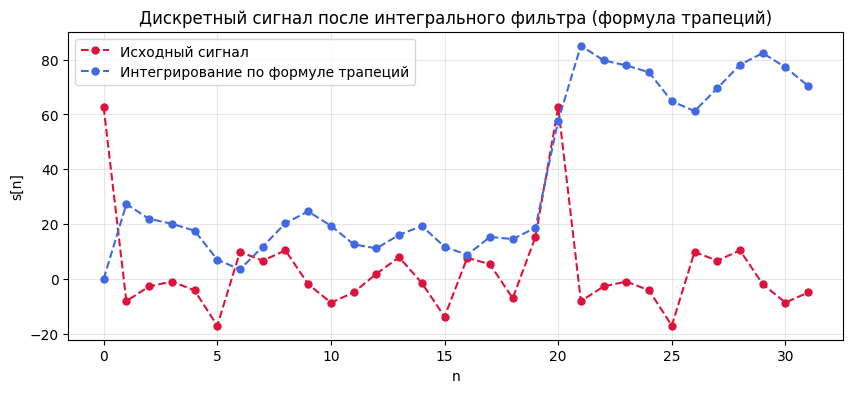

In [19]:
# График отфильтрованного сигнала (интегрирование по формуле трапеций)
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал', markersize=5)
plt.plot(Xn, Y_int_trap, 'o--', color='royalblue', label='Интегрирование по формуле трапеций', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал после интегрального фильтра (формула трапеций)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

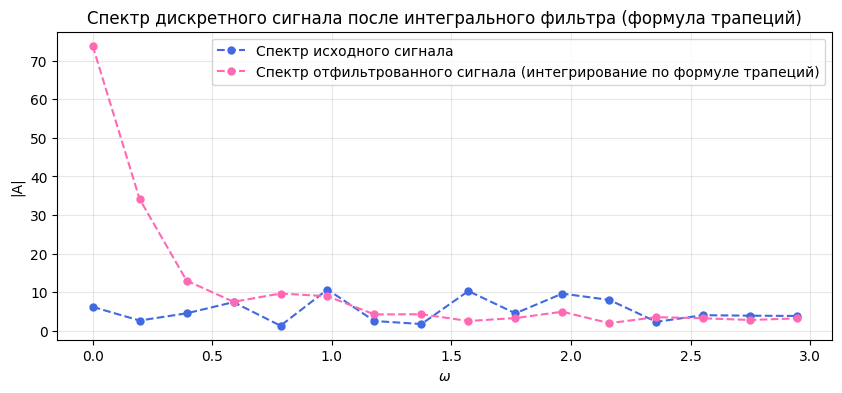

In [20]:
# Преобразование Фурье для отфильтрованного сигнала
F_int_trap = np.fft.fft(Y_int_trap, norm='forward')[:N // 2] * 2

# Спектр отфильтрованного сигнала
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_int_trap], 'o--', color='hotpink', label='Спектр отфильтрованного сигнала (интегрирование по формуле трапеций)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Спектр дискретного сигнала после интегрального фильтра (формула трапеций)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### 10. Интегральный фильтр (формула Симпсона)

Формула передаточной функции для интегрального фильтра, соответствующего квадратурной формуле Симпсона:

$$y[n] = y[n-1] + \frac{x[n-1] + 4x[n] + x[n+1]}{3}$$

$$H(\omega) = \frac{T(e^{-i\omega} + 4 + e^{i\omega})}{3(1 - e^{-i\omega})}$$


In [21]:
# Интегрирование по формуле Симпсона
def int_simpson(S):
    Y = [0]
    for i in range(1, len(S)-1):
        Y.append(Y[-1] + (S[i-1] + 4*S[i] + S[i+1]) / 3)
    return Y + [0]

Y_int_simp = int_simpson(S)

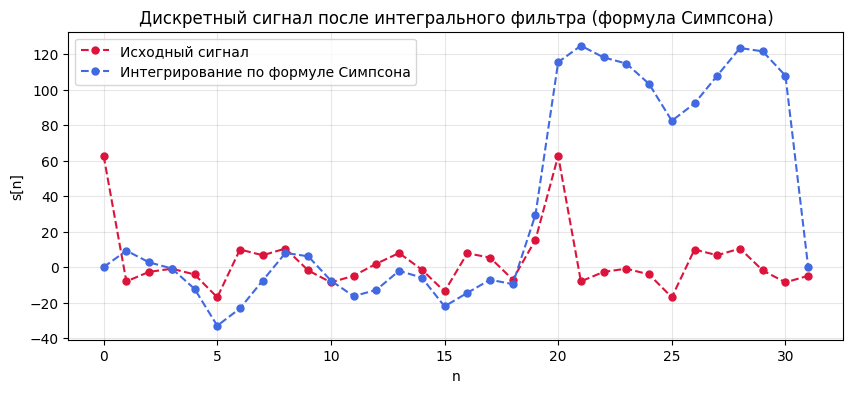

In [22]:
# График отфильтрованного сигнала (интегрирование по формуле Симпсона)
plt.figure(figsize=(10, 4))
plt.plot(Xn, S, 'o--', color='crimson', label='Исходный сигнал', markersize=5)
plt.plot(Xn, Y_int_simp, 'o--', color='royalblue', label='Интегрирование по формуле Симпсона', markersize=5)
plt.xlabel('n')
plt.ylabel('s[n]')
plt.title('Дискретный сигнал после интегрального фильтра (формула Симпсона)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

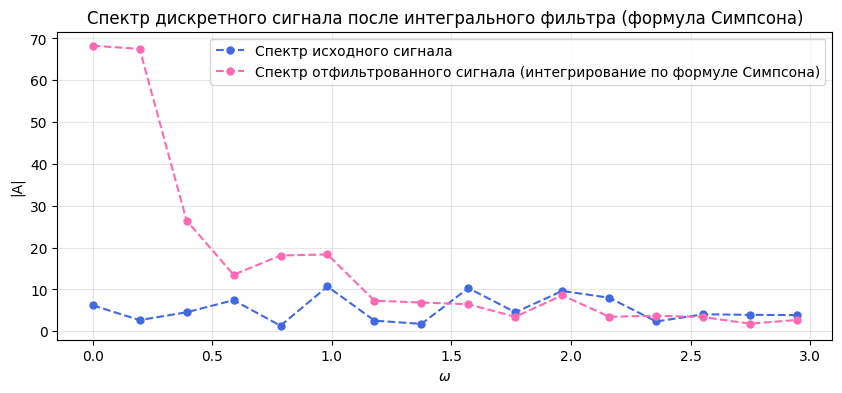

In [23]:
# Преобразование Фурье для отфильтрованного сигнала
F_int_simp = np.fft.fft(Y_int_simp, norm='forward')[:N // 2] * 2

# Спектр отфильтрованного сигнала
plt.figure(figsize=(10, 4))
plt.plot(W, [abs(f) for f in F], 'o--', color='royalblue', label='Спектр исходного сигнала', markersize=5)
plt.plot(W, [abs(f) for f in F_int_simp], 'o--', color='hotpink', label='Спектр отфильтрованного сигнала (интегрирование по формуле Симпсона)', markersize=5)
plt.xlabel('$\\omega$')
plt.ylabel('|A|')
plt.title('Спектр дискретного сигнала после интегрального фильтра (формула Симпсона)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

**Интерпретация интегральных фильтров:** На графиках спектров интегральных фильтров можно заметить общую характеристику: подавляются высокие частоты, а низкие усиливаются. Это связано со свойствами интеграла: низкочастотные сигналы не успевают измениться настолько, чтобы сумма их значений на всём периоде стала убывать. Интегральные фильтры действуют как низкочастотные фильтры.


## Выводы

В результате выполнения работы был сформирован дискретный сигнал посредством дискретизации непрерывного сигнала в виде линейной комбинации 11 косинусоид вида $A_k\cos(\omega_k t + \varphi_k)$, для которых были случайно сгенерированы амплитуды и фазы. Для данного дискретного сигнала был построен дискретный спектр с помощью дискретного преобразования Фурье.

Для дискретного сигнала были применены следующие фильтры:

1. **Линейное сглаживание** по 5 и 9 точкам
2. **Дифференциальный фильтр первого порядка**
3. **Интегральные фильтры:**
   - Формула прямоугольников
   - Формула трапеций
   - Формула Симпсона

Для всех отфильтрованных сигналов было применено дискретное преобразование Фурье для нахождения спектра.

**Основные наблюдения:**

- **Линейное сглаживание** — низкочастотный фильтр, подавляет высокие частоты. При увеличении количества точек подавление усиливается.

- **Дифференциальный фильтр** — высокочастотный фильтр. Сильнее подавляет низкие частоты, пропуская высокие. Это связано с тем, что производная медленно меняющихся функций (низкие частоты) мала, а быстро меняющихся (высокие частоты) — велика.

- **Интегральные фильтры** — низкочастотные фильтры. Усиливают низкие частоты и подавляют высокие. Это связано с накопительным характером интегрирования: низкочастотные компоненты накапливаются, а высокочастотные взаимно компенсируются.

- Все три интегральных фильтра (прямоугольников, трапеций, Симпсона) демонстрируют схожие частотные характеристики, но формула Симпсона обеспечивает более точную аппроксимацию интеграла.

Результаты фильтрации соответствуют теоретическим передаточным функциям $H(\omega)$, полученным аналитически.

Таким образом, работа позволила получить практические навыки применения рекурсивных фильтров, основанных на формулах численного дифференцирования и интегрирования, и анализа их частотных характеристик с помощью ДПФ.
